### Fasi preliminari: Caricamento del dataset ed esplorazione iniziale

In [509]:
import pandas as pd
import matplotlib.pyplot as plt

In [510]:
# Load the dataset
df = pd.read_csv('popular_anime.csv')
# Display the first few rows of the dataset
display(df.head())
print(df.shape)
print(df.info())

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
0,52991,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy",TV,28.0,Finished Airing,2023-09-29T00:00:00+00:00,2024-03-22T00:00:00+00:00,24 min per ep,9.30,676737.0,1.0,PG-13 - Teens 13 or older,Madhouse,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",https://cdn.myanimelist.net/images/anime/1015/...,https://www.youtube.com/watch?v=ZEkwCGJ3o7M,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,2009-04-05T00:00:00+00:00,2010-07-04T00:00:00+00:00,24 min per ep,9.10,2223666.0,2.0,R - 17+ (violence & profanity),Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",https://cdn.myanimelist.net/images/anime/1208/...,https://www.youtube.com/watch?v=1ac3_YdSSy0,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24.0,Finished Airing,2011-04-06T00:00:00+00:00,2011-09-14T00:00:00+00:00,24 min per ep,9.07,1467570.0,3.0,PG-13 - Teens 13 or older,White Fox,"Frontier Works, Media Factory, Kadokawa Shoten...",https://cdn.myanimelist.net/images/anime/1935/...,https://www.youtube.com/watch?v=27OZc-ku6is,Eccentric scientist Rintarou Okabe has a never...
3,38524,Attack on Titan Season 3 Part 2,"Action, Drama, Suspense",TV,10.0,Finished Airing,2019-04-29T00:00:00+00:00,2019-07-01T00:00:00+00:00,23 min per ep,9.05,1700946.0,4.0,R - 17+ (violence & profanity),Wit Studio,"Production I.G, Dentsu, Mainichi Broadcasting ...",https://cdn.myanimelist.net/images/anime/1517/...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Seeking to restore humanity's diminishing hope...
4,28977,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51.0,Finished Airing,2015-04-08T00:00:00+00:00,2016-03-30T00:00:00+00:00,24 min per ep,9.05,264260.0,5.0,PG-13 - Teens 13 or older,Bandai Namco Pictures,"TV Tokyo, Aniplex, Dentsu",https://cdn.myanimelist.net/images/anime/3/720...,NaN,"Gintoki, Shinpachi, and Kagura return as the f..."


(28825, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               28825 non-null  int64  
 1   name             28825 non-null  object 
 2   genres           22756 non-null  object 
 3   type             28738 non-null  object 
 4   episodes         28046 non-null  float64
 5   status           28825 non-null  object 
 6   aired_from       27870 non-null  object 
 7   aired_to         10930 non-null  object 
 8   duration_per_ep  28825 non-null  object 
 9   score            18599 non-null  float64
 10  scored_by        18599 non-null  float64
 11  rank             21962 non-null  float64
 12  rating           28101 non-null  object 
 13  studios          16936 non-null  object 
 14  producers        13452 non-null  object 
 15  image            28825 non-null  object 
 16  trailer          5474 non-null   object 
 17  

In [511]:
# print the synopsis of the first anime
print(df['synopsis'][0])

During their decade-long quest to defeat the Demon King, the members of the hero's party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.

However, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her "usual" routine of collecting spells across the continent. Due to her different sense of time, she seemingly holds no strong feelings toward the experiences she went through.

As the years pass, Frieren gradually realizes how her days in the hero's party truly impacted her. Witnessing the deaths of two of her former companions, Frieren begins to regret having taken their presence for granted; she vows to better understand humans and create real personal connections. Although the story of that o

In [512]:
# count the number of anime with empty genres
empty_genres = df['genres'].isnull()
print(f"Number of anime with empty genres: {empty_genres.sum()}")
display(df[empty_genres].head())

Number of anime with empty genres: 6069


,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
53,55016,Idol,NaN,Music,1.0,Finished Airing,2023-04-12T00:00:00+00:00,NaN,3 min,8.72,18645.0,NaN,PG-13 - Teens 13 or older,Doga Kobo,NaN,https://cdn.myanimelist.net/images/anime/1921/...,NaN,Music video for
212,50183,Blue Giant,NaN,Movie,1.0,Finished Airing,2023-02-17T00:00:00+00:00,NaN,1 hr 59 min,8.39,14544.0,207.0,PG-13 - Teens 13 or older,Nut,"TOHO animation, Shogakukan",https://cdn.myanimelist.net/images/anime/1958/...,https://www.youtube.com/watch?v=h1I116oS_Lk,Ever since a fateful encounter with jazz music...
235,39167,Girls und Panzer das Finale – Part 4,NaN,Movie,1.0,Finished Airing,2023-10-06T00:00:00+00:00,NaN,54 min,8.36,7099.0,235.0,PG-13 - Teens 13 or older,Actas,"Bandai Visual, Lantis, Movic, Q-Tec, Hakuhodo ...",https://cdn.myanimelist.net/images/anime/1652/...,https://www.youtube.com/watch?v=qlXBwJfybdU,The Winter Continuous Track Cup semifinals are...
275,48653,Racing into the Night,NaN,Music,1.0,Finished Airing,2019-11-16T00:00:00+00:00,NaN,4 min,8.32,12106.0,NaN,PG-13 - Teens 13 or older,NaN,Sony Music Entertainment,https://cdn.myanimelist.net/images/anime/1548/...,NaN,Music video of the song
282,39112,Crying for Rain,NaN,Music,1.0,Finished Airing,2019-01-29T00:00:00+00:00,NaN,4 min,8.31,18800.0,NaN,PG-13 - Teens 13 or older,NaN,NaN,https://cdn.myanimelist.net/images/anime/1776/...,NaN,Music video for the song


### Pulizia del dataset riempendo i dati vuoti con valori predefiniti

In [513]:
# Clean the dataset by filling empty values
# Create a copy of the DataFrame to avoid modifying the original
df_clean = df.copy()
# Fill all empty values in all numeric columns with 0
for column in df_clean.select_dtypes(include=['float']).columns:
    df_clean[column] = df_clean[column].fillna(0)
# Fill all empty values in all string columns with 'Unknown'
for column in df_clean.select_dtypes(include=['object']).columns:
    df_clean[column] = df_clean[column].fillna('Unknown')


In [514]:
# Check that the aired_from and aired_to columns are in datetime format (only if not 'Unknown')
df_clean['aired_from'] = pd.to_datetime(df_clean['aired_from'], errors='coerce')
df_clean['aired_to'] = pd.to_datetime(df_clean['aired_to'], errors='coerce')

In [515]:
# check the cleaned DataFrame
display(df_clean.head())
print(df_clean.info())

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
0,52991,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy",TV,28.0,Finished Airing,2023-09-29 00:00:00+00:00,2024-03-22 00:00:00+00:00,24 min per ep,9.30,676737.0,1.0,PG-13 - Teens 13 or older,Madhouse,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",https://cdn.myanimelist.net/images/anime/1015/...,https://www.youtube.com/watch?v=ZEkwCGJ3o7M,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,2009-04-05 00:00:00+00:00,2010-07-04 00:00:00+00:00,24 min per ep,9.10,2223666.0,2.0,R - 17+ (violence & profanity),Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",https://cdn.myanimelist.net/images/anime/1208/...,https://www.youtube.com/watch?v=1ac3_YdSSy0,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24.0,Finished Airing,2011-04-06 00:00:00+00:00,2011-09-14 00:00:00+00:00,24 min per ep,9.07,1467570.0,3.0,PG-13 - Teens 13 or older,White Fox,"Frontier Works, Media Factory, Kadokawa Shoten...",https://cdn.myanimelist.net/images/anime/1935/...,https://www.youtube.com/watch?v=27OZc-ku6is,Eccentric scientist Rintarou Okabe has a never...
3,38524,Attack on Titan Season 3 Part 2,"Action, Drama, Suspense",TV,10.0,Finished Airing,2019-04-29 00:00:00+00:00,2019-07-01 00:00:00+00:00,23 min per ep,9.05,1700946.0,4.0,R - 17+ (violence & profanity),Wit Studio,"Production I.G, Dentsu, Mainichi Broadcasting ...",https://cdn.myanimelist.net/images/anime/1517/...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Seeking to restore humanity's diminishing hope...
4,28977,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51.0,Finished Airing,2015-04-08 00:00:00+00:00,2016-03-30 00:00:00+00:00,24 min per ep,9.05,264260.0,5.0,PG-13 - Teens 13 or older,Bandai Namco Pictures,"TV Tokyo, Aniplex, Dentsu",https://cdn.myanimelist.net/images/anime/3/720...,Unknown,"Gintoki, Shinpachi, and Kagura return as the f..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               28825 non-null  int64              
 1   name             28825 non-null  object             
 2   genres           28825 non-null  object             
 3   type             28825 non-null  object             
 4   episodes         28825 non-null  float64            
 5   status           28825 non-null  object             
 6   aired_from       27870 non-null  datetime64[ns, UTC]
 7   aired_to         10930 non-null  datetime64[ns, UTC]
 8   duration_per_ep  28825 non-null  object             
 9   score            28825 non-null  float64            
 10  scored_by        28825 non-null  float64            
 11  rank             28825 non-null  float64            
 12  rating           28825 non-null  object             
 13  studios         

In [516]:
# check the first rows for null values in aired_to column
display(df_clean[df_clean['aired_to'].isnull()].head())

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
5,60022,One Piece Fan Letter,"Action, Adventure, Fantasy",TV Special,1.0,Finished Airing,2024-10-20 00:00:00+00:00,NaT,24 min,9.04,83738.0,7.0,PG-13 - Teens 13 or older,Toei Animation,Unknown,https://cdn.myanimelist.net/images/anime/1455/...,https://www.youtube.com/watch?v=MewJ5bEM-5U,Although the golden age of piracy is about to ...
6,39486,Gintama: The Very Final,"Action, Comedy, Drama, Sci-Fi",Movie,1.0,Finished Airing,2021-01-08 00:00:00+00:00,NaT,1 hr 44 min,9.04,80788.0,6.0,PG-13 - Teens 13 or older,Bandai Namco Pictures,"TV Tokyo, Aniplex, Dentsu, Bandai, Warner Bros...",https://cdn.myanimelist.net/images/anime/1245/...,https://www.youtube.com/watch?v=Zn1filVUyf8,Two years have passed following the Tendoshuu'...
17,28851,A Silent Voice,"Award Winning, Drama",Movie,1.0,Finished Airing,2016-09-17 00:00:00+00:00,NaT,2 hr 10 min,8.93,1714673.0,18.0,PG-13 - Teens 13 or older,Kyoto Animation,"Shochiku, Pony Canyon, Kodansha, ABC Animation...",https://cdn.myanimelist.net/images/anime/1122/...,https://www.youtube.com/watch?v=XBNWo25izJ8,"As a wild youth, elementary school student Sho..."
20,15335,Gintama: The Movie: The Final Chapter: Be Fore...,"Action, Comedy, Sci-Fi",Movie,1.0,Finished Airing,2013-07-06 00:00:00+00:00,NaT,1 hr 50 min,8.90,141157.0,21.0,PG-13 - Teens 13 or older,Sunrise,"TV Tokyo, Aniplex, Dentsu, Bandai, Warner Bros...",https://cdn.myanimelist.net/images/anime/10/51...,https://www.youtube.com/watch?v=UhJM5rVqaF8,When Gintoki apprehends a movie pirate at a pr...
27,37987,Violet Evergarden: The Movie,"Award Winning, Drama",Movie,1.0,Finished Airing,2020-09-18 00:00:00+00:00,NaT,2 hr 20 min,8.84,313009.0,28.0,PG-13 - Teens 13 or older,Kyoto Animation,"Shochiku, ABC Animation",https://cdn.myanimelist.net/images/anime/1825/...,https://www.youtube.com/watch?v=NSIzsFOfd8M,Several years have passed since the end of The...


In [517]:
# Function to convert episode duration string to minutes
def convert_duration_to_minutes(duration):
    res = 0
    if 'hr' in duration:
        hours, minutes = duration.split('hr')
        duration = minutes.strip()  # keep the remaining part after 'hr'
        res += int(hours.strip()) * 60
    if 'min' in duration:
        duration = duration.split('min')[0]  # take the part before 'min'
        res += int(duration.strip())
    return res
    
print(convert_duration_to_minutes('2 hr 22 min'))  # Example usage

142


In [518]:
# apply the conversion function to the duration_per_ep column
df_clean['duration_per_ep_min'] = df_clean['duration_per_ep'].apply(convert_duration_to_minutes)

-----------------------------------------------------------------------------------------------------

### Analisi iniziale del dataset pulito

In [519]:
# group the data by start year and count the number of anime for each year
df_clean['aired_from_year'] = df_clean['aired_from'].dt.year
anime_per_year = df_clean.groupby('aired_from_year').size().reset_index(name='count')
display(anime_per_year)

,aired_from_year,count
0,1917.0,17
1,1918.0,9
2,1922.0,1
3,1923.0,1
4,1924.0,5
...,...,...
103,2023.0,1263
104,2024.0,1244
105,2025.0,759
106,2026.0,65


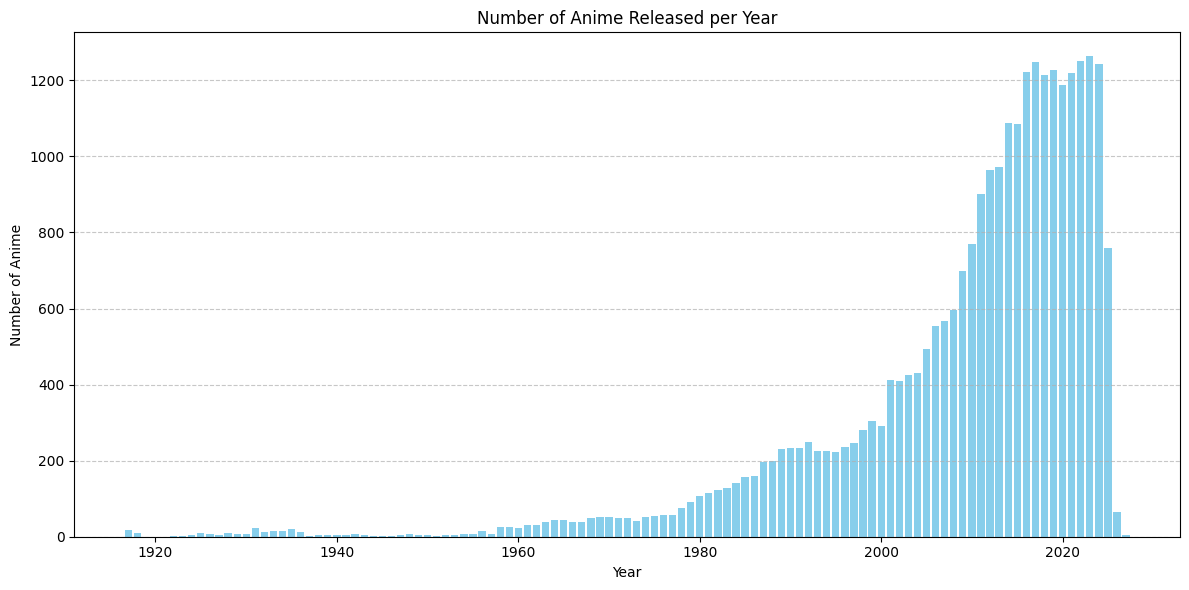

In [520]:
# plot the number of anime per year 
plt.figure(figsize=(12, 6))
plt.bar(anime_per_year['aired_from_year'], anime_per_year['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Anime')
plt.title('Number of Anime Released per Year')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Commento al plot:

#### Negli anni tra il 1990 e il 2016, la produzione di anime ha visto una grande crescita passando da circa 200 a 1200 anime prodotti all'anno, valore che si è poi stabilizzato negli ultimi 10 anni indicando una saturazione

In [521]:
# create a column for the season of the aried_from date
df_clean['aired_from_season'] = df_clean['aired_from'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df_clean['aired_from_season'] = df_clean['aired_from_season'].map(season_map)
display(df_clean[['name','aired_from_year','aired_from_season']].head(10))


,name,aired_from_year,aired_from_season
0,Frieren: Beyond Journey's End,2023.0,Fall
1,Fullmetal Alchemist: Brotherhood,2009.0,Spring
2,Steins;Gate,2011.0,Spring
3,Attack on Titan Season 3 Part 2,2019.0,Spring
4,Gintama Season 4,2015.0,Spring
5,One Piece Fan Letter,2024.0,Fall
6,Gintama: The Very Final,2021.0,Winter
7,Hunter x Hunter,2011.0,Fall
8,Gintama Season 2,2011.0,Spring
9,Gintama: Enchousen,2012.0,Fall


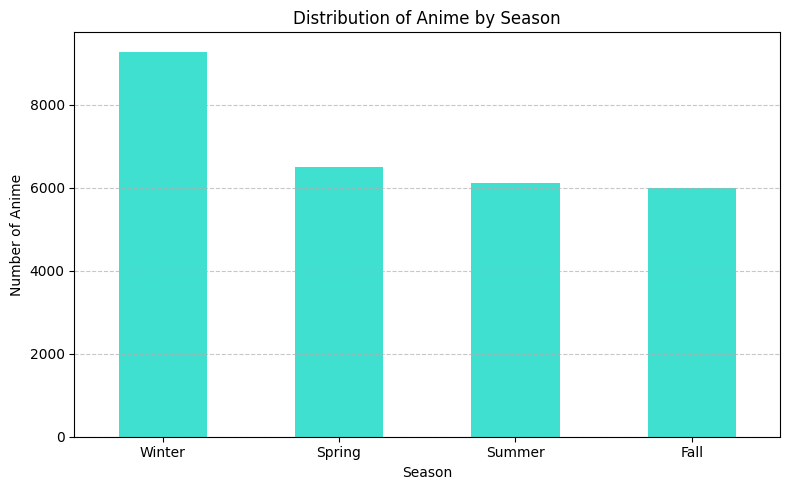

In [522]:
# create a plot to visualize the distribution of anime by season
season_counts = df_clean['aired_from_season'].value_counts()
plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='turquoise')
plt.title('Distribution of Anime by Season')
plt.xlabel('Season')
plt.ylabel('Number of Anime')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Commento
#### Il plot mostra come ci sia un leggero sbilanciamento della produzione degli anime nella stagione invernale. Questo può essere dovuto al fatto che d'inverno le persone tendono a passare più tempo a casa per via del freddo, e quindi hanno più tempo per guardare anime.

In [523]:
# find the maximum and average score per year for animes aired later than 1990 and up to 2024
max_rate_year_1990 = df_clean[(df_clean['aired_from_year'] > 1990) & (df_clean['aired_from_year'] < 2025)].groupby('aired_from_year')['score'].max()
avg_rate_year_1990 = df_clean[(df_clean['aired_from_year'] > 1990) & (df_clean['aired_from_year'] < 2025)].groupby('aired_from_year')['score'].mean()
max_rate_year_1990 = max_rate_year_1990.reset_index()
avg_rate_year_1990 = avg_rate_year_1990.reset_index()
# merge the two DataFrames
rate_year_1990 = max_rate_year_1990.merge(avg_rate_year_1990, on='aired_from_year', suffixes=('_max', '_avg'))
display(rate_year_1990)

,aired_from_year,score_max,score_avg
0,1991.0,7.86,4.295948
1,1992.0,8.46,4.368105
2,1993.0,8.55,4.670354
3,1994.0,7.90,4.590000
4,1995.0,8.36,4.502556
5,1996.0,8.28,4.794085
6,1997.0,8.67,4.422967
7,1998.0,8.75,4.429893
8,1999.0,8.73,4.704620
9,2000.0,8.78,4.536034


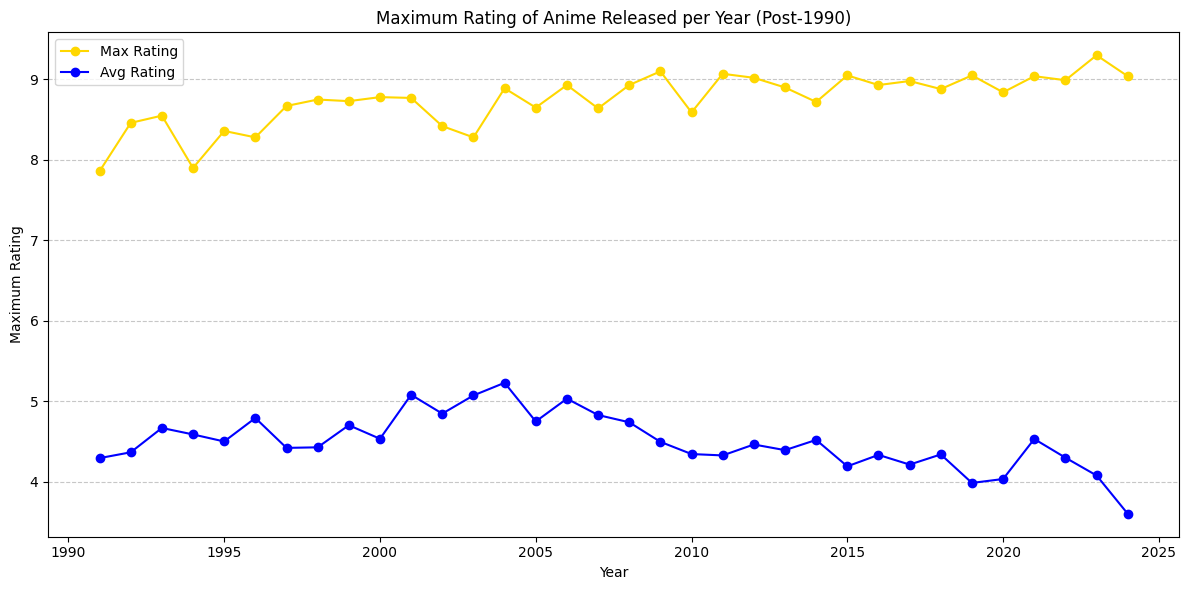

In [524]:
# draw a line plot for the maximum and average score per year for animes aired later than 1990
plt.figure(figsize=(12, 6))
plt.plot(rate_year_1990['aired_from_year'], rate_year_1990['score_max'], marker='o', color='gold')
plt.plot(rate_year_1990['aired_from_year'], rate_year_1990['score_avg'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Maximum Rating')
plt.title('Maximum Rating of Anime Released per Year (Post-1990)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(['Max Rating', 'Avg Rating'])
plt.show()

### Commento:
#### Il grafico mostra che il top rating degli anime prodotti dal 1990 in poi è andato crescendo con il tempo, mentre il rating medio ha subito un calo. L'incremento della produzione degli ultimi anni ha dunque portato a produrre sia anime molto graditi ed apprezzati, ma anche tanti anime di bassa qualità.

---------------------------------------------------------------------------------------------------------

### Da qui in poi inizia uno studio più approfondito delle varie colonne per poter migliorare la comprensione del dataset ed eventualmente applicare dei filtri per migliorare ulteriormente la pulizia dei dati

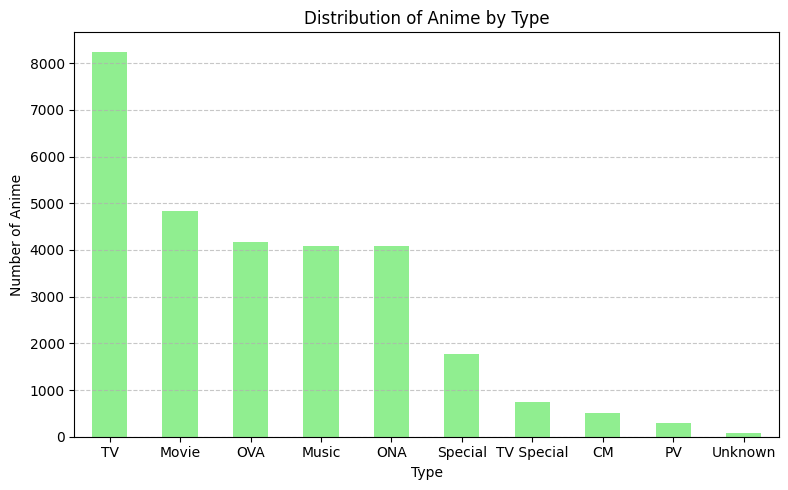

In [525]:
# count anime by type
anime_type_counts = df_clean['type'].value_counts()
plt.figure(figsize=(8, 5))
anime_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Anime by Type')
plt.xlabel('Type')
plt.ylabel('Number of Anime')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [526]:
# create a list of all the genres in the dataset
all_genres = set()
for genres in df_clean['genres'].str.split(', '):
    all_genres.update(genres)
all_genres = sorted(all_genres)
print("All Genres in the Dataset:")
print(all_genres)

All Genres in the Dataset:
['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Unknown']


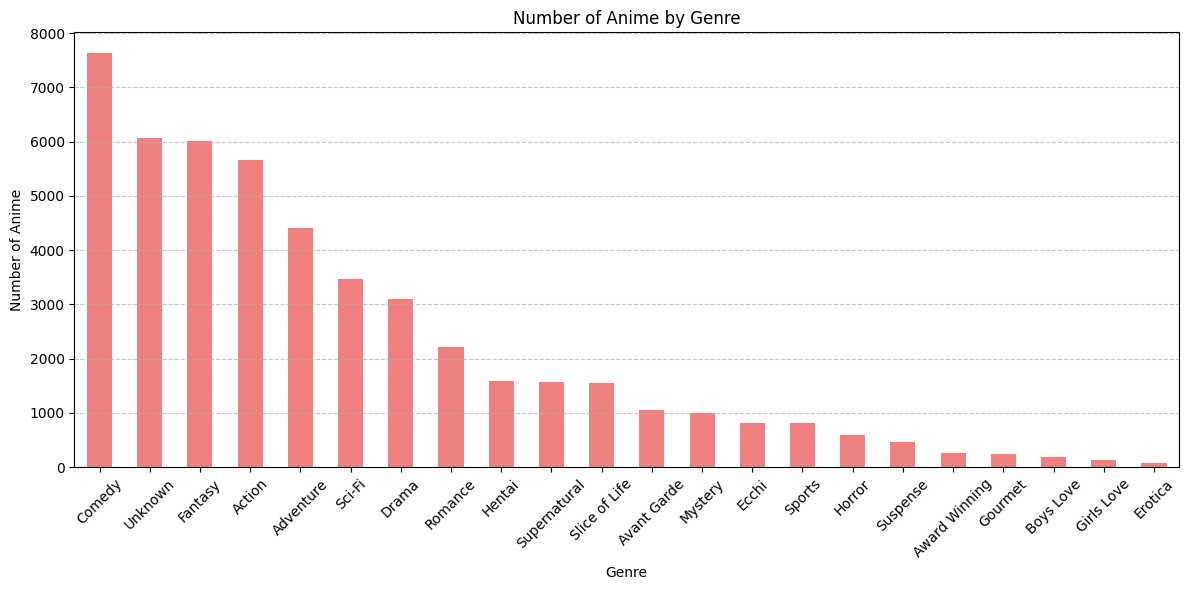

In [527]:
# count the number of anime for each genre
genre_counts = df_clean['genres'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Anime by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [528]:
# List anime with 'Avant Garge' genre
avant_garde_anime = df_clean[df_clean['genres'].str.contains('Avant Garde', case=False, na=False)]
print("Anime with 'Avant Garde' Genre:")
display(avant_garde_anime[['name', 'type', 'genres']].head(10))

Anime with 'Avant Garde' Genre:


,name,type,genres
117,Neon Genesis Evangelion: The End of Evangelion,Movie,"Action, Avant Garde, Drama, Sci-Fi, Suspense"
122,Perfect Blue,Movie,"Avant Garde, Award Winning, Drama, Horror, Sus..."
239,Neon Genesis Evangelion,TV,"Action, Avant Garde, Award Winning, Drama, Sci..."
487,Kaiba,TV,"Adventure, Avant Garde, Award Winning, Mystery..."
560,Serial Experiments Lain,TV,"Avant Garde, Award Winning, Drama, Mystery, Sc..."
633,Paprika,Movie,"Avant Garde, Award Winning, Mystery, Sci-Fi, S..."
637,FLCL,OVA,"Action, Avant Garde, Comedy, Sci-Fi, Suspense"
812,Penguindrum,TV,"Avant Garde, Drama, Mystery, Supernatural, Sus..."
853,Welcome to Irabu's Office,TV,"Avant Garde, Drama"
1114,Mind Game,Movie,"Adventure, Avant Garde, Award Winning, Comedy,..."


In [529]:
# create a categorical variable for each genre
for genre in all_genres:
    df_clean[genre] = df_clean['genres'].str.contains(genre, case=False, na=False).astype(int)

In [530]:
# list all the age ratings in the dataset
age_ratings = df_clean['rating'].unique()
print("Age Ratings in the Dataset:")
for rating in age_ratings:
    print(rating)

Age Ratings in the Dataset:
PG-13 - Teens 13 or older
R - 17+ (violence & profanity)
R+ - Mild Nudity
PG - Children
G - All Ages
Rx - Hentai
Unknown


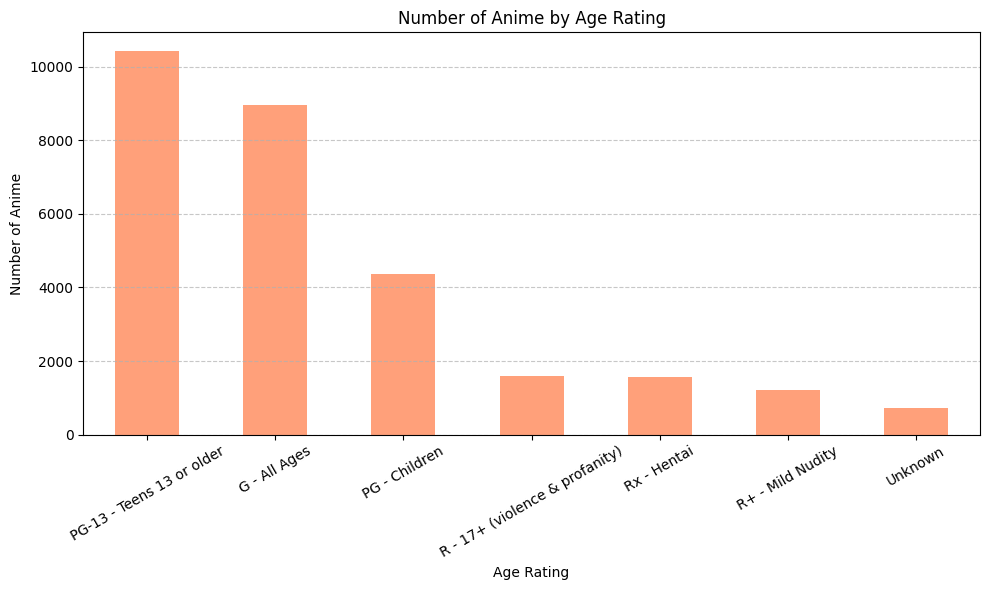

In [531]:
# plot the number of anime per age rating
plt.figure(figsize=(10, 6))
age_rating_counts = df_clean['rating'].value_counts()
age_rating_counts.plot(kind='bar', color='lightsalmon')
plt.title('Number of Anime by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Number of Anime')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

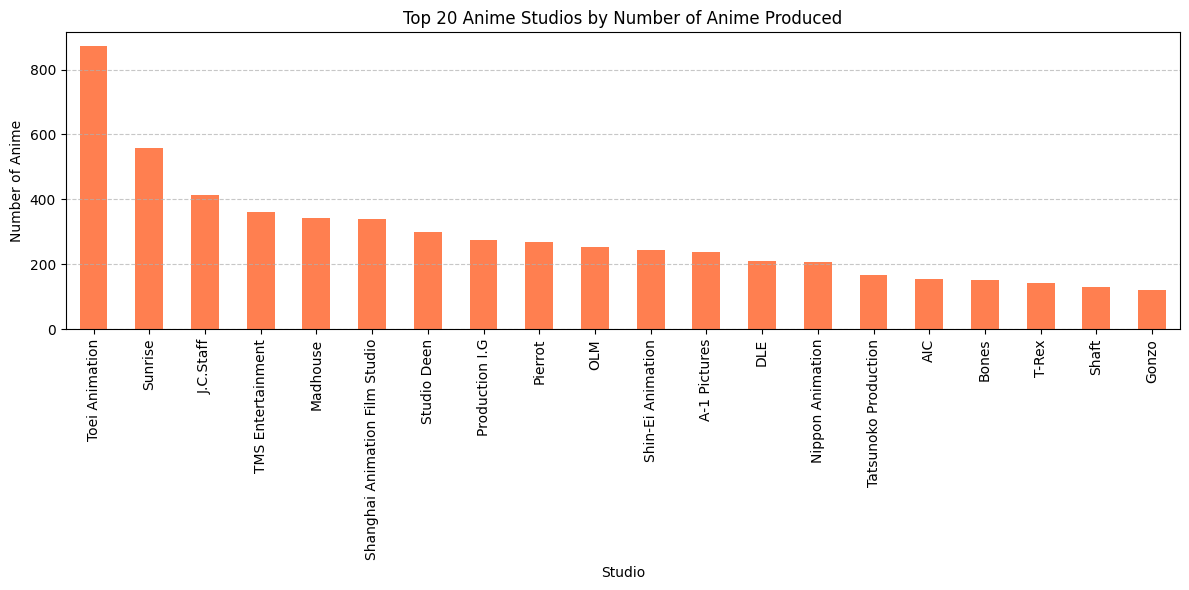

In [532]:
# plot the number of anime by studios
studio_counts = df_clean['studios'].value_counts()
studio_counts = studio_counts[studio_counts.index != 'Unknown'] # remove the 'Unknown' values
plt.figure(figsize=(12, 6))
studio_counts.head(20).plot(kind='bar', color='coral') # take the top 20 studios
plt.title('Top 20 Anime Studios by Number of Anime Produced')
plt.xlabel('Studio')
plt.ylabel('Number of Anime')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [533]:
# count all the studios found in the dataset
print(f"Total number of studios found in the dataset: {len(studio_counts)}")
# count studios with more than a certain number of anime
for i in range(30, 51):
    big_studio_counts = studio_counts[studio_counts > i] # take only studios with more than 10 anime
    print(f"Number of studios with more than {i} anime: {len(big_studio_counts)}")


Total number of studios found in the dataset: 1862
Number of studios with more than 30 anime: 100
Number of studios with more than 31 anime: 99
Number of studios with more than 32 anime: 97
Number of studios with more than 33 anime: 95
Number of studios with more than 34 anime: 92
Number of studios with more than 35 anime: 88
Number of studios with more than 36 anime: 85
Number of studios with more than 37 anime: 85
Number of studios with more than 38 anime: 83
Number of studios with more than 39 anime: 79
Number of studios with more than 40 anime: 76
Number of studios with more than 41 anime: 76
Number of studios with more than 42 anime: 75
Number of studios with more than 43 anime: 75
Number of studios with more than 44 anime: 74
Number of studios with more than 45 anime: 70
Number of studios with more than 46 anime: 70
Number of studios with more than 47 anime: 68
Number of studios with more than 48 anime: 68
Number of studios with more than 49 anime: 66
Number of studios with more 

In [534]:
# print the number of anime produced by ghibli and ufotable studios
ghibli_count = studio_counts.get('Studio Ghibli', 0)
ufotable_count = studio_counts.get('ufotable', 0)
print(f"Number of anime produced by Studio Ghibli: {ghibli_count}")
print(f"Number of anime produced by ufotable: {ufotable_count}")

Number of anime produced by Studio Ghibli: 50
Number of anime produced by ufotable: 73


In [535]:
# list anime with Unkown studios
unknown_studios = df_clean[df_clean['studios'] == 'Unknown']
print("Anime with Unknown Studios shape:", unknown_studios.shape)
display(unknown_studios[['name', 'type', 'studios']].head())


Anime with Unknown Studios shape: (11889, 43)


,name,type,studios
175,Heaven Official's Blessing Short Film,ONA,Unknown
176,Heaven Official's Blessing Short Film,ONA,Unknown
275,Racing into the Night,Music,Unknown
282,Crying for Rain,Music,Unknown
548,Genshin Impact: The Song Burning in the Embers,ONA,Unknown


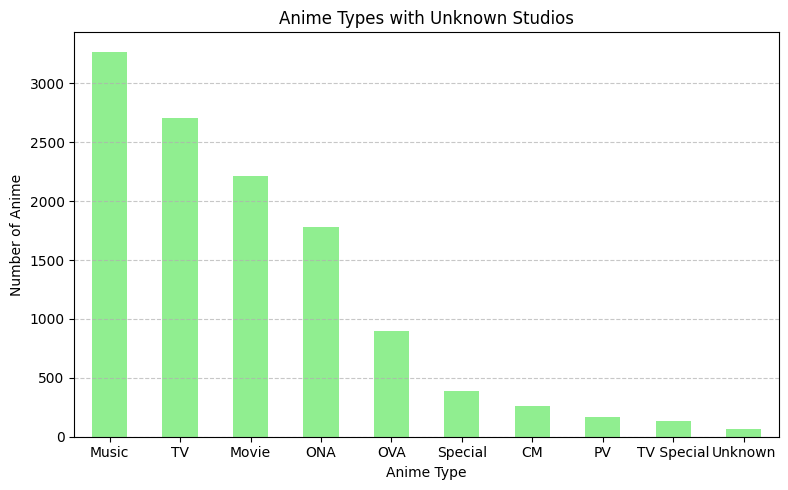

In [536]:
# plot anime types for unknown studios
plt.figure(figsize=(8, 5))
unknown_studios['type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Anime Types with Unknown Studios')
plt.xlabel('Anime Type')
plt.ylabel('Number of Anime')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [537]:
# show the first 10 rows of anime with Unknown studios with type TV and Movie
unknown_studios_tv_movie = unknown_studios[unknown_studios['type'].isin(['TV', 'Movie'])]
display(unknown_studios_tv_movie[['name', 'type', 'studios']].head(10))
print("Total number of anime with Unknown studios and type TV or Movie:", unknown_studios_tv_movie.shape[0])

,name,type,studios
1566,Detective Conan: Conan vs. Kid - Shark & Jewel,Movie,Unknown
2810,Attack on Titan in the Dome: Soldiers' Starry Sky,Movie,Unknown
3016,I Am What I Am,Movie,Unknown
3036,Dae Jang Geum: Jang Geum's Dream 2,TV,Unknown
3367,Dae Jang Geum: Jang Geum's Dream,TV,Unknown
3374,Detective Conan: Conan vs. Kid - Jet Black Sniper,Movie,Unknown
3594,Red Shoes and the Seven Dwarfs,Movie,Unknown
4026,My Little Goat,Movie,Unknown
4115,Cencoroll,Movie,Unknown
4329,Oseam,Movie,Unknown


Total number of anime with Unknown studios and type TV or Movie: 4914


In [538]:
# count the number of Unknown in each string column
unknown_counts = df_clean.select_dtypes(include=['object']).apply(lambda x: (x == 'Unknown').sum())
print("Count of 'Unknown' in each string column:")
print(unknown_counts)

Count of 'Unknown' in each string column:
name                     0
genres                6069
type                    87
status                   0
duration_per_ep        929
rating                 724
studios              11889
producers            15373
image                    0
trailer              23351
synopsis              5368
aired_from_season        0
dtype: int64


In [539]:
# count the number of rows with 'Unknown' in both genres and synopsis
unknown_genres_synopsis = df_clean[(df_clean['genres'] == 'Unknown') & (df_clean['synopsis'] == 'Unknown')]
print("Number of rows with 'Unknown' in both genres and synopsis:", unknown_genres_synopsis.shape[0])

Number of rows with 'Unknown' in both genres and synopsis: 1710


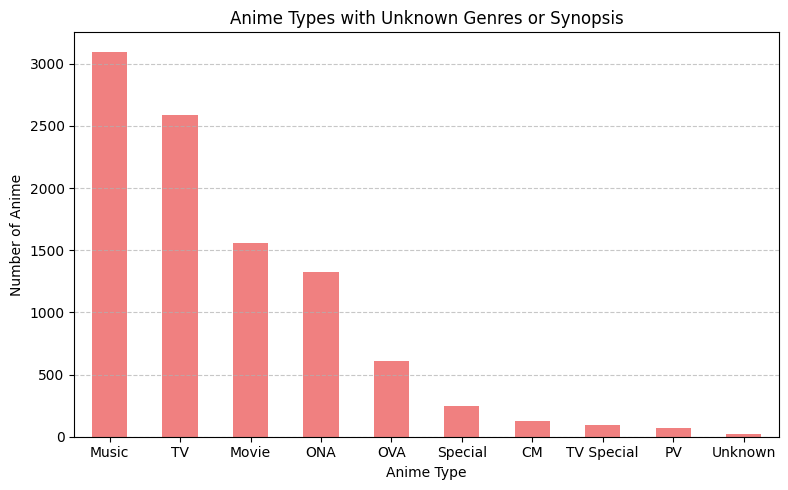

In [540]:
# count and plot the types of anime with unknown genres or synopsis
unknown_genres_synopsis = df_clean[(df_clean['genres'] == 'Unknown') | (df_clean['synopsis'] == 'Unknown')]
unknown_genres_synopsis_counts = unknown_genres_synopsis['type'].value_counts()

plt.figure(figsize=(8, 5))
unknown_genres_synopsis_counts.plot(kind='bar', color='lightcoral')
plt.title('Anime Types with Unknown Genres or Synopsis')
plt.xlabel('Anime Type')
plt.ylabel('Number of Anime')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Applicazione dei filtri

In [541]:
# remove age rating 'Unknown' and 'Rx - Hentai'
df_filtered = df_clean[(df_clean['rating'] != 'Unknown') & (df_clean['rating'] != 'Rx - Hentai')]
# check the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", df_filtered.shape)

Shape of the filtered DataFrame: (26526, 43)


In [542]:
# remove rows less relevant types ('Unknown', 'PV', 'CM', 'Music')
less_relevant_types = ['Unknown', 'PV', 'CM', 'Music']
df_filtered = df_filtered[~df_filtered['type'].isin(less_relevant_types)]
# check the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", df_filtered.shape)

Shape of the filtered DataFrame: (21648, 43)
 (21648, 43)


In [543]:
# count the number of Unknown in each string column
unknown_counts = df_filtered.select_dtypes(include=['object']).apply(lambda x: (x == 'Unknown').sum())
print("Count of 'Unknown' in each string column:")
print(unknown_counts)

Count of 'Unknown' in each string column:
name                     0
genres                2771
type                     0
status                   0
duration_per_ep        392
rating                   0
studios               7709
producers            11629
image                    0
trailer              16557
synopsis              4845
aired_from_season        0
dtype: int64


In [544]:
# count the number of zero in each numeric column
zero_counts = df_filtered.select_dtypes(include=['float']).apply(lambda x: (x == 0).sum())
print("Count of '0' in each numeric column:")
print(zero_counts)

Count of '0' in each numeric column:
episodes            352
score              7522
scored_by          7522
rank                447
aired_from_year       0
dtype: int64


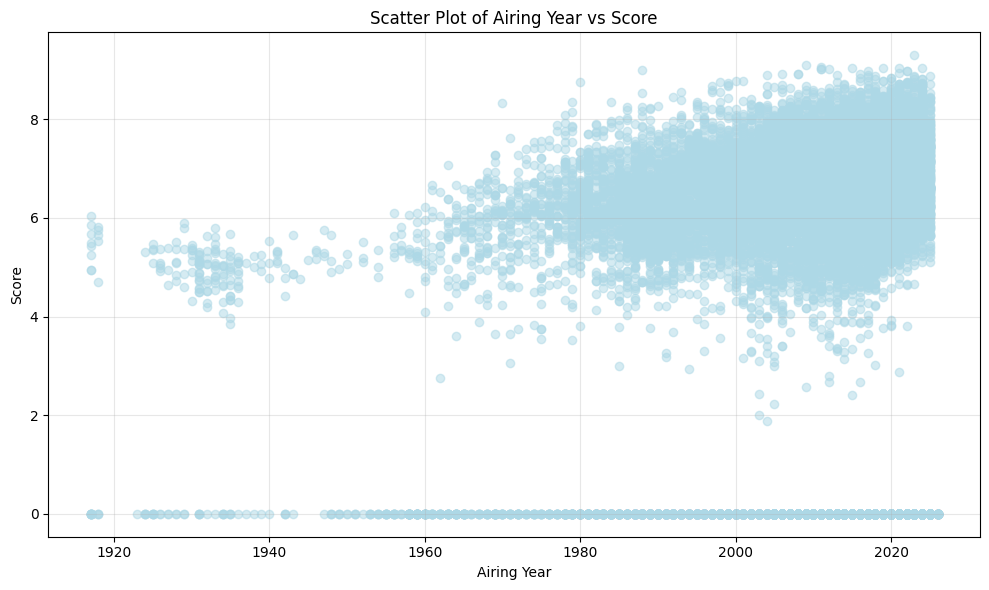

In [545]:
# scatter plot of the score vs aired_from_year
df_filtered = df_filtered.dropna(subset=['aired_from_year', 'score'])
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['aired_from_year'].values, y = df_filtered['score'].values, color='lightblue', alpha=0.5)
plt.title('Scatter Plot of Airing Year vs Score')
plt.xlabel('Airing Year')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Commento
##### Dallo scatter plot è evidente che nel dataset ci sono molti anime che non hanno ricevuto un punteggio e che sono quindi stati mappati con il valore 0. Tale valore potrebbe falsare i risultati delle analisi sul punteggio, ed è quindi opportuno rimuoverli.

In [546]:
# save rows with zero in the score column for later analysis
df_zero_score = df_filtered[df_filtered['score'] == 0]
# check the shape of the DataFrame with zero score
print("Shape of the DataFrame with zero score:", df_zero_score.shape)

# remove rows with zero in the score column
df_filtered = df_filtered[(df_filtered['score'] > 0)]
# check the shape of the filtered DataFrame
print("Shape of the filtered DataFrame after removing rows with zero in score:", df_filtered.shape)

Shape of the DataFrame with zero score: (6809, 43)
Shape of the filtered DataFrame after removing rows with zero in score: (14114, 43)


-------------------------------------------------------------------------------------------

### Riproduzione dell'analisi iniziale usando il dataset filtrato e focalizzandosi sulle tipologie TV e Movie

In [547]:
# select only TV and Movie anime with start year between 1990 and 2025
tv_anime_1990 = df_filtered[(df_filtered['type'] == 'TV') & (df_filtered['aired_from_year'] > 1990) & (df_filtered['aired_from_year'] < 2025)]
movie_anime_1990 = df_filtered[(df_filtered['type'] == 'Movie') & (df_filtered['aired_from_year'] > 1990) & (df_filtered['aired_from_year'] < 2025)]

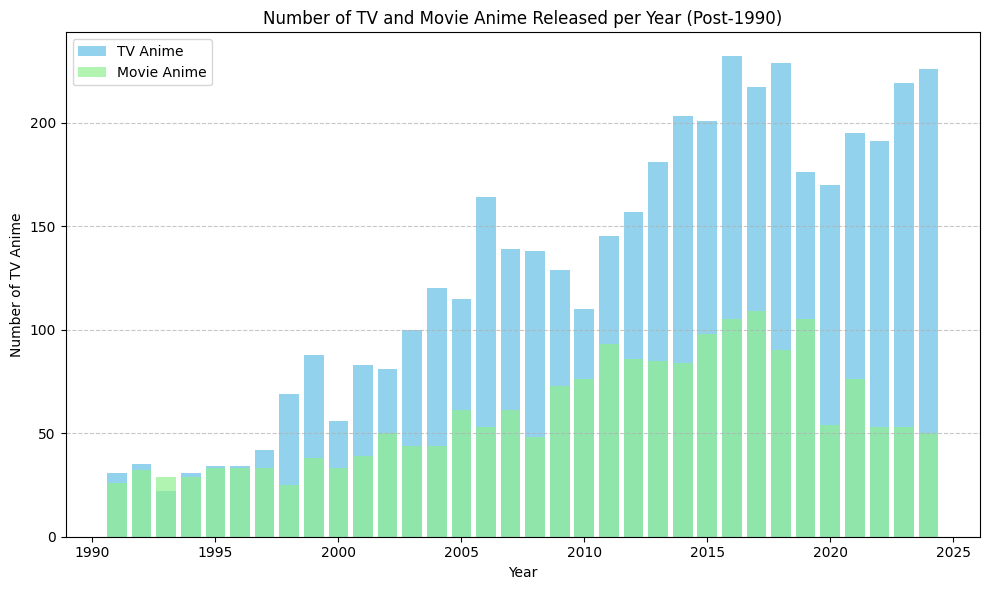

In [548]:
# plot the number of TV and Movie anime per year (after 1990)
tv_anime_per_year = tv_anime_1990.groupby('aired_from_year').size().reset_index(name='count')
movie_anime_per_year = movie_anime_1990.groupby('aired_from_year').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(tv_anime_per_year['aired_from_year'], tv_anime_per_year['count'], color='skyblue', alpha=0.9)
plt.bar(movie_anime_per_year['aired_from_year'], movie_anime_per_year['count'], color='lightgreen', alpha=0.7)
plt.legend(['TV Anime', 'Movie Anime'])
plt.xlabel('Year')
plt.ylabel('Number of TV Anime')
plt.title('Number of TV and Movie Anime Released per Year (Post-1990)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [549]:
# plot max and average rating for TV and Movie anime per year (after 1990)
tv_max_rate_year_1990 = tv_anime_1990.groupby('aired_from_year')['score'].max().reset_index()
tv_avg_rate_year_1990 = tv_anime_1990.groupby('aired_from_year')['score'].mean().reset_index()
movie_max_rate_year_1990 = movie_anime_1990.groupby('aired_from_year')['score'].max().reset_index()
movie_avg_rate_year_1990 = movie_anime_1990.groupby('aired_from_year')['score'].mean().reset_index()
# merge the DataFrames
tv_rate_year_1990 = tv_max_rate_year_1990.merge(tv_avg_rate_year_1990, on='aired_from_year', suffixes=('_max', '_avg'))
movie_rate_year_1990 = movie_max_rate_year_1990.merge(movie_avg_rate_year_1990, on='aired_from_year', suffixes=('_max', '_avg'))

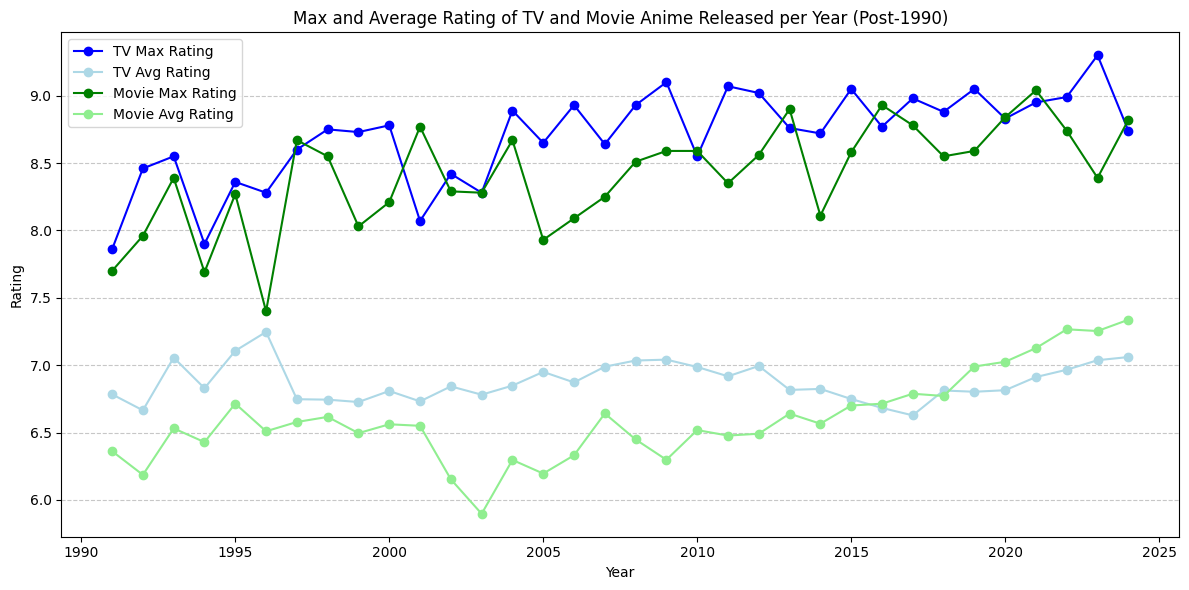

In [550]:
# plot the data
plt.figure(figsize=(12, 6))
plt.plot(tv_rate_year_1990['aired_from_year'], tv_rate_year_1990['score_max'], marker='o', color='blue')
plt.plot(tv_rate_year_1990['aired_from_year'], tv_rate_year_1990['score_avg'], marker='o', color='lightblue')
plt.plot(movie_rate_year_1990['aired_from_year'], movie_rate_year_1990['score_max'], marker='o', color='green')
plt.plot(movie_rate_year_1990['aired_from_year'], movie_rate_year_1990['score_avg'], marker='o', color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Max and Average Rating of TV and Movie Anime Released per Year (Post-1990)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(['TV Max Rating', 'TV Avg Rating', 'Movie Max Rating', 'Movie Avg Rating'])
plt.show()

### Commento:
#### Lo studio iniziale è stato ripetuto considerando le due categorie più rilevanti (Serie TV e Films) e dopo un filtraggio dei dati che va a rimuovere soprattutto gli anime con punteggio non disponibile (e quindi nullo). Le considerazioni precedenti restano valide, ed anzi in questo frangente si nota che anche la media per le serie TV rimane piuttosto costante mentre per i film sembra avere un andamento crescente. Ciò va quindi a rafforzare ulteriormente la conclusione secondo cui la qualità degli anime è in costante crescita.

In [551]:
# create a linear regression model to evaluate the relationship between the airing year and the score of anime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for linear regression
# drop rows with NaN values in 'aired_from_year' or 'score'
df_filtered = df_filtered.dropna(subset=['aired_from_year', 'score'])
X = df_filtered['aired_from_year'].values
y = df_filtered['score'].values

In [552]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [553]:
# evaluate the model
score_train = model.score(X_train, y_train)
print(f"Model R^2 Score (train): {score_train:.4f}")
score = model.score(X_test, y_test)
print(f"Model R^2 Score (test): {score:.4f}")

Model R^2 Score (train): 0.0783
Model R^2 Score (test): 0.0883


In [554]:
# evaluate mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.7838


In [555]:
# print the coefficients of the model
print(f"Model Coefficients: {model.coef_[0]:.4f} (slope), {model.intercept_:.4f} (intercept)")

Model Coefficients: 0.0167 (slope), -26.9192 (intercept)


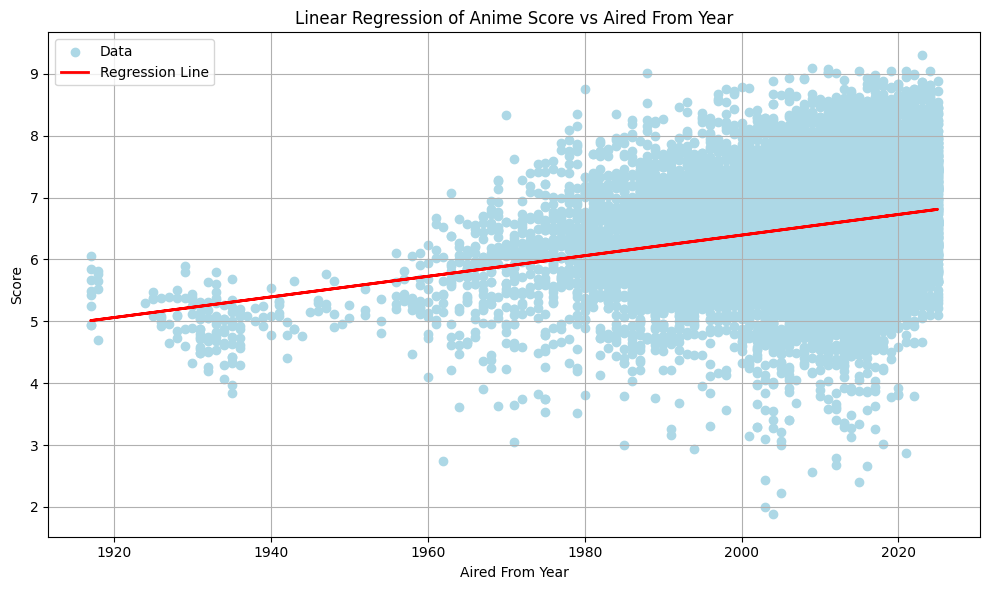

In [556]:
# plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightblue', label='Data')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Aired From Year')
plt.ylabel('Score')
plt.title('Linear Regression of Anime Score vs Aired From Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Commento
##### Anche la regressione lineare conferma il trend crescente dei punteggi già evidenziato, e ulteriormente avvalorato dal coefficente positivo della retta di regressione.

-------------------------------------------------------

In [557]:
# print all columns in the DataFrame
print("Columns in the DataFrame:")
print(df_filtered.columns.tolist())

Columns in the DataFrame:
['id', 'name', 'genres', 'type', 'episodes', 'status', 'aired_from', 'aired_to', 'duration_per_ep', 'score', 'scored_by', 'rank', 'rating', 'studios', 'producers', 'image', 'trailer', 'synopsis', 'duration_per_ep_min', 'aired_from_year', 'aired_from_season', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Unknown']


In [558]:
# Select numerical features for the model
numerical_features = ['episodes', 'duration_per_ep_min', 'aired_from_year']

# Select categorical features for the model
ordinal_features = ['rating']  # 'rating' can be treated as ordinal
nominal_features = ['type'] #, 'studios']  # 'type' and 'studios' can be one-hot encoded
binary_features = all_genres # genres columns can be treated as binary features

# target feature
target_feature = 'score'

#### La colonna degli studios è stata rimossa in quanto generava overtraining e rendeva difficile leggere i risultati.

In [559]:
# create a multi-variable linear regression model to predict the score based on other features
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a preprocessor for the numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), nominal_features),
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop'  # drop any other columns not specified
)

# Create a pipeline that combines the preprocessor with the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [560]:
# create training and testing sets
X = df_filtered[numerical_features + ordinal_features + nominal_features + binary_features]
y = df_filtered[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

In [561]:
# fit the model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [562]:
# calcolo delle metriche di valutazione
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_train))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2: {r2:.4f}")
print(f"Train R^2: {train_r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2: 0.3963
Train R^2: 0.3744
RMSE: 0.6975


In [563]:
# Get feature names after preprocessing
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
print(f"Total number of features after preprocessing: {len(feature_names)}")

# Coefficients of the linear regression model
coefficients = model.named_steps["regressor"].coef_
print(f"Number of coefficients extracted: {len(coefficients)}")

# Model intercept
intercept = model.named_steps["regressor"].intercept_
print(f"Model intercept: {intercept:.4f}")

Total number of features after preprocessing: 31
Number of coefficients extracted: 31
Model intercept: 5.9806


In [564]:
# Create a DataFrame to better analyze the coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Importance': np.abs(coefficients)  # Absolute value for ranking
}).sort_values('Absolute_Importance', ascending=False)

# Clean feature names to make them more readable
coef_df['Clean_Feature'] = coef_df['Feature'].str.replace('num__', '').str.replace('ord__', '').str.replace('nom__', '').str.replace('bin__', '').str.replace('_', ' ').str.title()
display(coef_df[['Clean_Feature', 'Coefficient', 'Absolute_Importance']].head(31))

,Clean_Feature,Coefficient,Absolute_Importance
21,Hentai,-1.249074,1.249074
11,Avant Garde,-0.731246,0.731246
17,Erotica,-0.674168,0.674168
12,Award Winning,0.515277,0.515277
7,Type Tv,0.457671,0.457671
22,Horror,-0.424664,0.424664
27,Sports,0.335613,0.335613
16,Ecchi,-0.300616,0.300616
15,Drama,0.283094,0.283094
23,Mystery,0.271544,0.271544


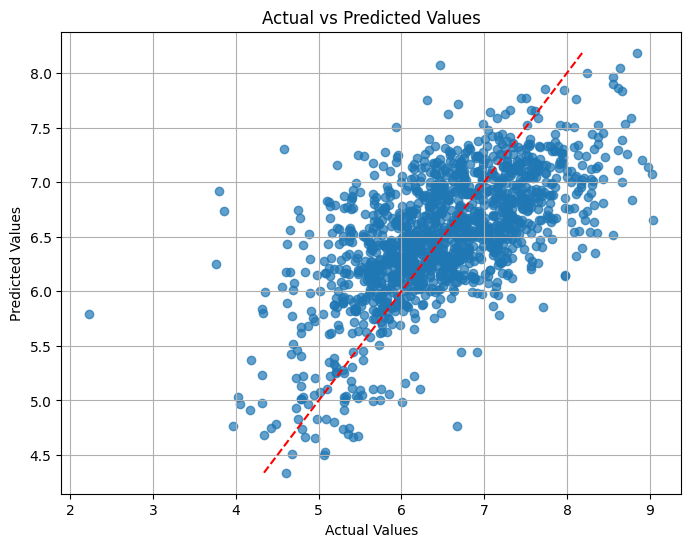

In [565]:
# plot of actual vs predicted values in the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

### Commento
#### La bontà del fit ha un valore ~0.4 che risulta relativamente basso, ma d'altronde non è facile sapere a priori se un anime sarà apprezzato date solo le sue caratteristiche base (generi, durata, tipologia) e poco altro. Lo scatter plot dei valori predetti vs valori reali mostra comunque che il modello sta riuscendo a creare delle predizioni abbastanza centrate rispetto al bulk della popolazione di test.

---------------------------------------------

In [566]:
# create predicions for the subset with score == 0
y_zero_score = df_zero_score[numerical_features + ordinal_features + nominal_features + binary_features]
y_zero_score_pred = model.predict(y_zero_score)

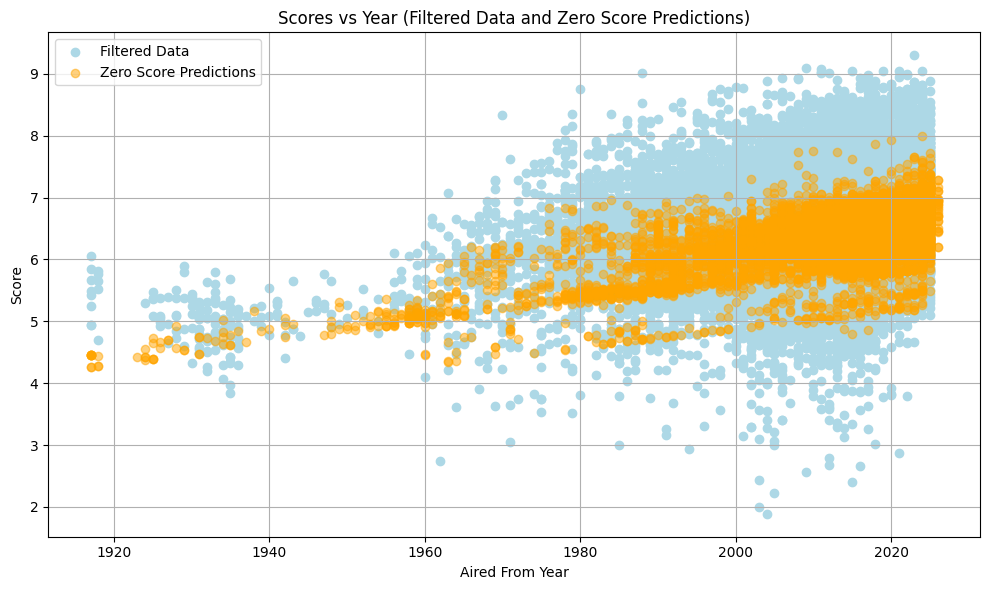

In [586]:
# scatter plot of scores vs year for the filtered dataset and the zero score predictions
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['aired_from_year'], df_filtered['score'], color='lightblue', label='Filtered Data')
plt.scatter(df_zero_score['aired_from_year'], y_zero_score_pred, color='orange', label='Zero Score Predictions', alpha=0.5)
plt.xlabel('Aired From Year')
plt.ylabel('Score')
plt.title('Scores vs Year (Filtered Data and Zero Score Predictions)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [570]:
# print the anime not yet aired (status == 'Not yet aired') from the 0 score predictions
df_zero_score_pred = df_zero_score.copy()  # ensure we are working with a copy
df_zero_score_pred['score'] = y_zero_score_pred  # add predictions to the zero score DataFrame
not_yet_aired_zero_score = df_zero_score_pred[df_zero_score_pred['status'] == 'Not yet aired']
print("Anime not yet aired with zero score predictions:")
display(not_yet_aired_zero_score[['name', 'aired_from', 'aired_to', 'score']])
print(f"Average of the zero score predictions for not yet aired anime: {not_yet_aired_zero_score['score'].mean():.2f}")

Anime not yet aired with zero score predictions:


,name,aired_from,aired_to,score
18613,Plus,2025-01-01 00:00:00+00:00,NaT,6.261927
18617,White Cat Legend Season 3,2025-01-01 00:00:00+00:00,NaT,6.702854
18761,Da Wang Rao Ming 3,2025-01-01 00:00:00+00:00,NaT,6.564059
18853,Brave Animated Series,2025-01-01 00:00:00+00:00,2025-01-01 00:00:00+00:00,7.037627
18855,Sazangakyuu,2025-06-09 00:00:00+00:00,NaT,5.978693
...,...,...,...,...
22583,Cardfight!! Vanguard: Divinez Deluxe Kesshou-hen,2025-07-05 00:00:00+00:00,NaT,6.740463
22996,My Dress-Up Darling Season 2,2025-07-06 00:00:00+00:00,NaT,6.846031
23069,One Punch Man Season 3,2025-10-01 00:00:00+00:00,NaT,6.929933
23181,New Panty & Stocking with Garterbelt,2025-07-10 00:00:00+00:00,NaT,6.715264


Average of the zero score predictions for not yet aired anime: 6.68


In [ ]:
# Impute zero scores using KNNImputer
from sklearn.impute import KNNImputer

# Combine back filtered data (with score > 0) and those with score = 0
df_combined = pd.concat([df_filtered, df_zero_score], ignore_index=False)

# Select features for imputation
features_for_imputation = numerical_features + binary_features + [target_feature]

# Prepare data for imputation: replace score=0 with NaN for imputation
df_for_imputation = df_combined[features_for_imputation].copy()
df_for_imputation.loc[df_for_imputation['score'] == 0, 'score'] = np.nan

print(f"Shape of the combined DataFrame: {df_combined.shape}")
print(f"Number of NaN values in 'score' to impute: {df_for_imputation['score'].isna().sum()}")

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_data = imputer.fit_transform(df_for_imputation)

# Create DataFrame with imputed data
df_imputed = pd.DataFrame(imputed_data, columns=features_for_imputation, index=df_combined.index)

Shape of the combined DataFrame: (20923, 43)
Number of NaN values in 'score' to impute: 6809


In [587]:
# Extract the subset of anime that originally had score = 0
# Use the indices of the df_zero_score DataFrame to filter the imputed results

df_zero_score_imputed = df_imputed.loc[df_zero_score.index].copy()

# Add other columns from the original DataFrame (name, type, genres, etc.)
df_zero_score_with_predictions = df_zero_score_pred.copy()
df_zero_score_with_predictions['score_imputed'] = df_zero_score_imputed['score']

print(f"Shape of the subset with imputed scores: {df_zero_score_imputed.shape}")
print(f"Shape of the complete DataFrame with predictions: {df_zero_score_with_predictions.shape}")

# Show some examples
print("\nFirst 5 anime with imputed scores:")
display(df_zero_score_with_predictions[['name', 'type', 'aired_from_year', 'score', 'score_imputed']].head())
print(f"Average of the predicted scores: {df_zero_score_with_predictions['score'].mean():.2f}")
print(f"Average of the imputed scores: {df_zero_score_with_predictions['score_imputed'].mean():.2f}")

Shape of the subset with imputed scores: (6809, 26)
Shape of the complete DataFrame with predictions: (6809, 44)

First 5 anime with imputed scores:


,name,type,aired_from_year,score,score_imputed
18600,Coluboccoro (2019),Movie,2019.0,6.247666,6.722
18608,Zenless Zone Zero - Hoshimi Miyabi Animated Sh...,ONA,2024.0,6.271439,6.716
18611,The Haunting Tale of Poltchageist,ONA,2023.0,6.026926,6.470
18612,Hello Osaka,ONA,2023.0,6.203008,6.694
18613,Plus,ONA,2025.0,6.261927,6.508


Average of the predicted scores: 6.27
Average of the imputed scores: 6.30


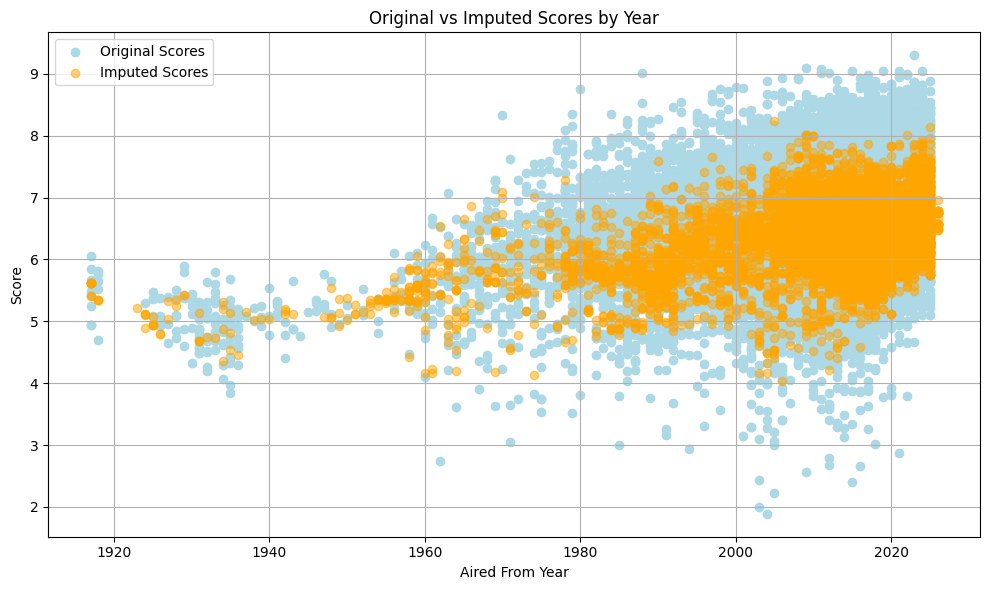

In [ ]:
# compare the inputed scores with the original scores
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['aired_from_year'], df_filtered['score'], color='lightblue', label='Original Scores')
plt.scatter(df_zero_score_with_predictions['aired_from_year'], df_zero_score_with_predictions['score_imputed'], color='orange', label='Imputed Scores', alpha=0.5)
plt.xlabel('Aired From Year')
plt.ylabel('Score')
plt.title('Original vs Imputed Scores vs Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

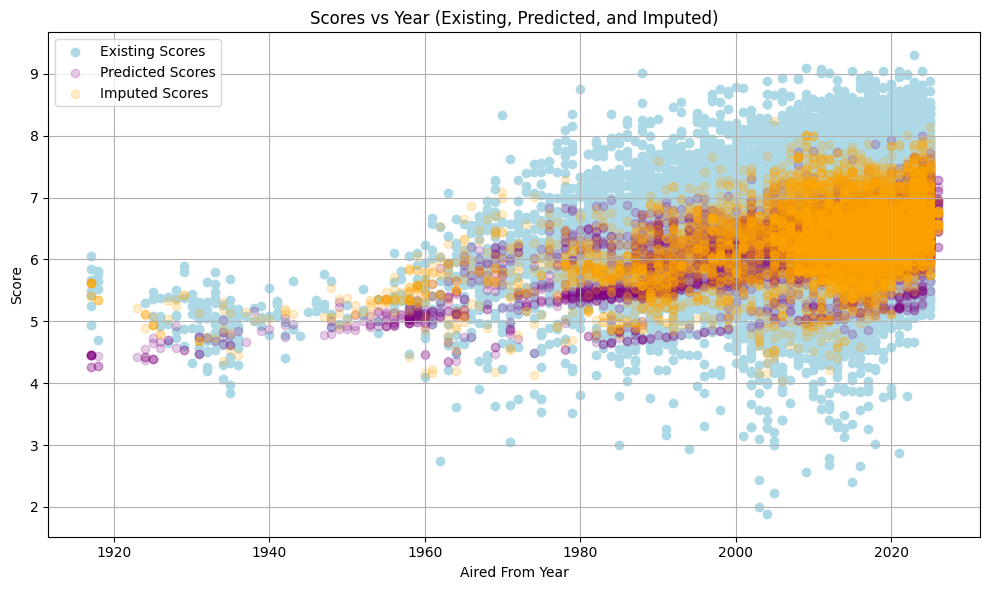

In [597]:
# scatter plot of existing scores - predicted scores - imputed scores vs year
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['aired_from_year'], df_filtered['score'], color='lightblue', label='Existing Scores')
plt.scatter(df_zero_score_with_predictions['aired_from_year'], df_zero_score_with_predictions['score'], color='purple', label='Predicted Scores', alpha=0.2)
plt.scatter(df_zero_score_with_predictions['aired_from_year'], df_zero_score_with_predictions['score_imputed'], color='orange', label='Imputed Scores', alpha=0.2)
plt.xlabel('Aired From Year')
plt.ylabel('Score')
plt.title('Scores vs Year (Existing, Predicted, and Imputed)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Commento:
#### Gli score imputati usando il KNNImputer mostrano di adattarsi ai dati esistenti in maniera più appropiata rispetto a quelli predetti usando il modello di regressione lineare creato in questo studio.